In [90]:
from pynq import Overlay
from pynq import Xlnk
import numpy as np
from matplotlib import pyplot as plt

In [91]:
ol=Overlay('design_1_wrapper.bit')
LeNet_ip = ol.lenet_0

In [114]:
length_in = 28
length_out = 10

inpt=Xlnk().cma_array(shape=(1,length_in,length_in),dtype=np.float32)
outpt=Xlnk().cma_array(shape=(length_out,),dtype=np.float32)

image_in = np.zeros(shape=(1,28,28))
with open("image_0_in.dat","r") as f:
    data = f.read().split()

data = np.array(data)
data = data.astype(float)

idx=0
for i in range(len(data)):
    if(i%28 == 0):
        idx+=1
    image_in[0][idx-1][i%28] = data[i]

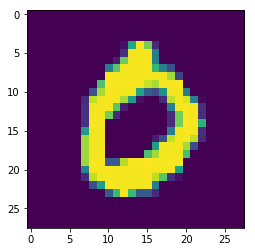

In [115]:
plt.imshow(image_in[0])

In [116]:
np.copyto(inpt,image_in)

In [117]:
LeNet_ip.write(0x10,inpt.physical_address)
LeNet_ip.write(0x18,outpt.physical_address)
LeNet_ip.write(0x00,1)

In [119]:
print(outpt)

[  9.99981642e-01   5.66092800e-13   1.12533108e-07   5.64631328e-12
   4.19371867e-13   1.86497484e-09   1.67013950e-05   2.81113376e-13
   5.09580537e-11   1.51511631e-06]


In [125]:
print("Prediction: " + str(np.where(np.round(outpt) == 1)[0][0]))

Prediction: 0
